<a href="https://colab.research.google.com/github/Mohamm76/Saudi-Date-Fruit-Classification-AI/blob/main/notebooks/Date_Fruit_Classification_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
# تأكد من مطابقة اسم المجلد كما هو موجود في درايف لديك (Portfolio أو Porfolio)
project_path = '/content/drive/MyDrive/AI_Portfolio/Saudi_Date_Classification'
if not os.path.exists(project_path):
    os.makedirs(project_path)
os.chdir(project_path)
print(f"المسار الحالي للمشروع الثاني: {os.getcwd()}")

Mounted at /content/drive
المسار الحالي للمشروع الثاني: /content/drive/MyDrive/AI_Portfolio/Saudi_Date_Classification


# جلب البيانات وتجهيزها في درايف

In [3]:
# 1. تثبيت المحرك اللازم لقراءة ملفات الإكسل الحديثة
!pip install openpyxl --quie

In [4]:
import os
import pandas as pd
import requests

# 2. إعداد المسارات (تأكد من استخدام الاسم الظاهر في درايف لديك AI_Porfolio)
drive_base = '/content/drive/MyDrive/AI_Porfolio/Saudi_Date_Classification'
data_folder = os.path.join(drive_base, 'data')
file_path = os.path.join(data_folder, 'Date_Fruit_Datasets.xlsx')

if not os.path.exists(data_folder):
    os.makedirs(data_folder, exist_ok=True)

# 3. تحميل الملف من رابط "Raw" مباشر لضمان عدم تحميل صفحة HTML
# هذا الرابط هو المسار المباشر للملف الأصلي
url = "https://github.com/DataRohit/Date-Fruit-Classification/raw/master/Date_Fruit_Datasets.xlsx"

print("جاري تحميل بيانات التمور السعودية من المصدر الموثق...")
response = requests.get(url, allow_redirects=True)
with open(file_path, 'wb') as f:
    f.write(response.content)

# 4. قراءة البيانات مع تحديد المحرك (engine) يدوياً لحل المشكلة
try:
    # تحديد engine='openpyxl' يحل خطأ التنسيق
    df = pd.read_excel(file_path, engine='openpyxl')

    print("-" * 30)
    print(f"نجاح باهر! تم تحميل وقراءة مصفوفة البيانات بنجاح.")
    print(f"عدد العينات: {df.shape} تمرة، عدد الخصائص المورفولوجية: {df.shape[1] - 1}")
    print("\nأصناف التمور السبعة المتوفرة في المشروع:")
    print(df['Class'].unique())

    # عرض أول 5 صفوف
    display(df.head())

except Exception as e:
    print(f"فشلت عملية القراءة مجدداً. الخطأ التقني: {e}")

جاري تحميل بيانات التمور السعودية من المصدر الموثق...
------------------------------
نجاح باهر! تم تحميل وقراءة مصفوفة البيانات بنجاح.
عدد العينات: (898, 35) تمرة، عدد الخصائص المورفولوجية: 34

أصناف التمور السبعة المتوفرة في المشروع:
['BERHI' 'DEGLET' 'DOKOL' 'IRAQI' 'ROTANA' 'SAFAVI' 'SOGAY']


,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


# تحليل الفروقات بين التمور السعودية
في هذه المرحلة، سنقوم بـ:

التأكد من عدم وجود بيانات مفقودة (Null values).

تحويل أسماء التمور (Labels) إلى أرقام ليفهمها النموذج.

رسم مصفوفة الارتباط (Correlation Matrix) لمعرفة أي الميزات هي الأهم في التمييز بين الأنواع.

فحص القيم المفقودة:
0

تم تحويل الأصناف إلى أرقام:
0 : BERHI
1 : DEGLET
2 : DOKOL
3 : IRAQI
4 : ROTANA
5 : SAFAVI
6 : SOGAY


/tmp/ipython-input-336556923.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Class', palette='viridis')


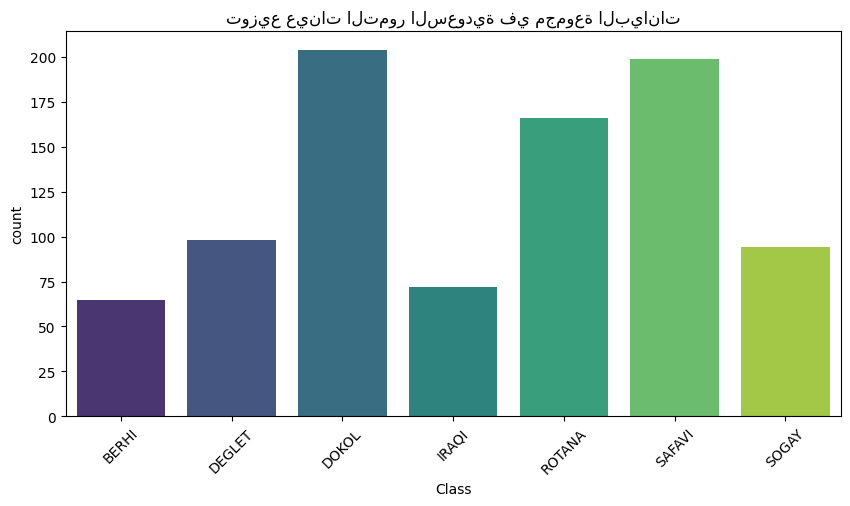

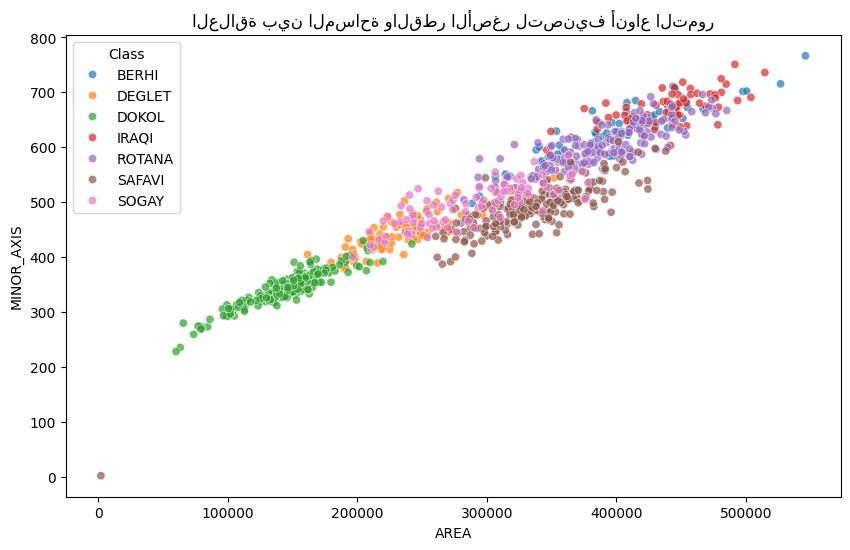

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# 1. فحص البيانات المفقودة (Data Integrity)
print("فحص القيم المفقودة:")
print(df.isnull().sum().sum())

# 2. تحويل التسميات النصية إلى أرقام (Label Encoding)
# هذا ضروري لأن الخوارزميات الرياضية لا تتعامل مع النصوص مباشرة
le = LabelEncoder()
df['Class_Numeric'] = le.fit_transform(df['Class'])
print("\nتم تحويل الأصناف إلى أرقام:")
for i, item in enumerate(le.classes_):
    print(f"{i} : {item}")

# 3. تحليل التوزيع: كم عينة لدينا من كل نوع؟
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Class', palette='viridis')
plt.title("توزيع عينات التمور السعودية في مجموعة البيانات")
plt.xticks(rotation=45)
plt.show()

# 4. مقارنة ميزتين (مثلاً المساحة Area مقابل القطر Minor Axis)
# لنرى كيف تتجمع كل فئة تمر في منطقة معينة
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='AREA', y='MINOR_AXIS', hue='Class', alpha=0.7)
plt.title("العلاقة بين المساحة والقطر الأصغر لتصنيف أنواع التمور")
plt.show()